In [72]:
# Install pandas, requests, bs4, html5lib, lxml and plotly
!!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define graphing function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 1 - Extracting Tesla Stock Data Using yfinance

In [58]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

## IMPORTANT Using 'lxml' instead of 'html5lib' since the latter throws errors due to the Python version

In [125]:
# Download the information from HTML
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, "lxml")

tables = pd.read_html(str(soup), match="Tesla Quarterly Revenue", flavor='lxml')
tesla_revenue = tables[0]
tesla_revenue.head()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2024-12-31,"$25,707"
1,2024-09-30,"$25,182"
2,2024-06-30,"$25,500"
3,2024-03-31,"$21,301"
4,2023-12-31,"$25,167"


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [110]:
# Create a ticker object for GameStop using its stock symbol "GME"
gamestop = yf.Ticker("GME")

# 'history' method to extract historical stock data
# 'period' is set to "max" to retrieve the maximum available data
gme_data = gamestop.history(period="max")

# Reset the index of the DataFrame so that 'Date' becomes a regular column
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

## IMPORTANT: Using 'lxml' instead of 'html5lib' since the latter throws errors due to the Python version

In [116]:
# URL for GameStop revenue page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Add headers to avoid 403 errors
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Request the page
response = requests.get(url, headers=headers)

# Parse the page using lxml
soup = BeautifulSoup(response.text, "lxml")

# Extract the table that contains "GameStop Quarterly Revenue"
tables = pd.read_html(str(soup), match="GameStop Quarterly Revenue", flavor='lxml')
gme_revenue = tables[0]

# Rename columns to 'Date' and 'Revenue' for clarity
gme_revenue.columns = ["Date", "Revenue"]

# Remove commas and dollar signs from the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")

# Drop any rows with missing values
gme_revenue.dropna(inplace=True)

# Display the last 5 rows
gme_revenue.tail()


,Date,Revenue
59,2010-01-31,3524
60,2009-10-31,1835
61,2009-07-31,1739
62,2009-04-30,1981
63,2009-01-31,3492


# Question 5 - Tesla Stock and Revenue Dashboard

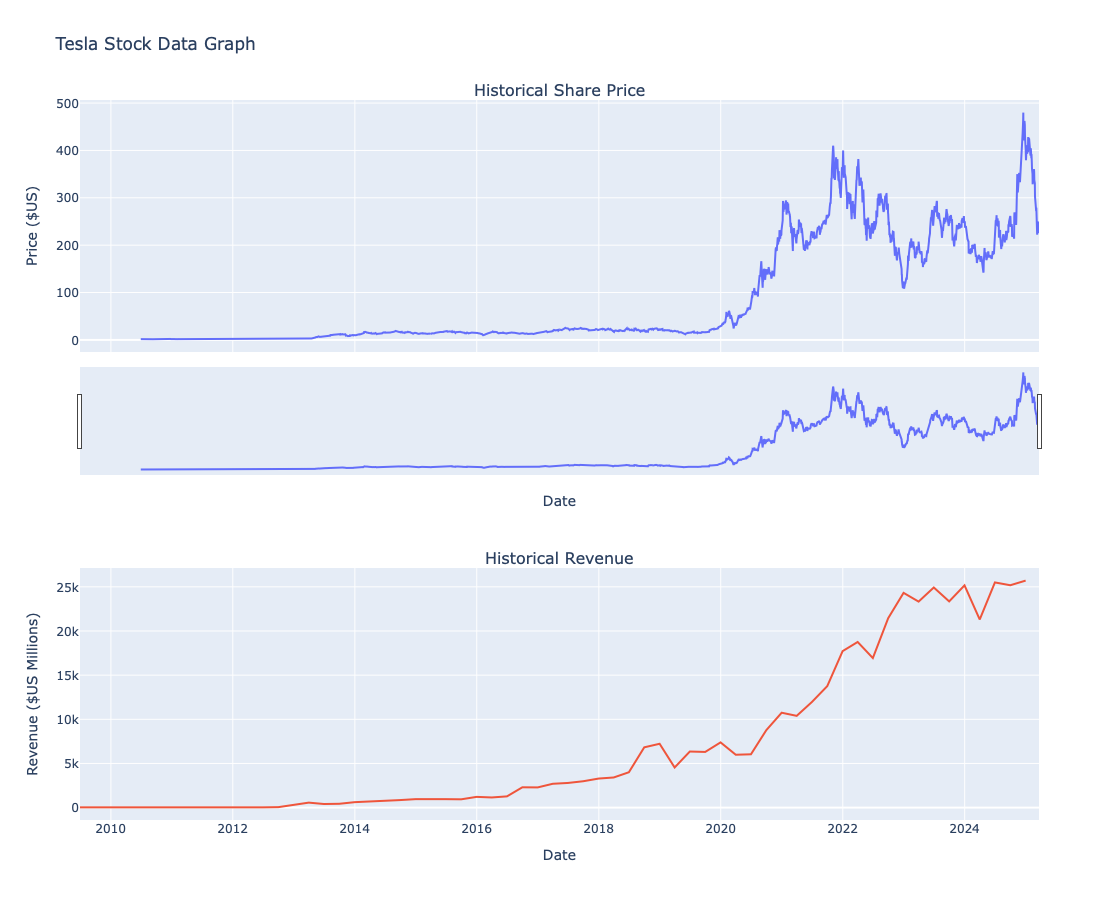

In [138]:
# Call the Plotting Function
make_graph(tesla_data, tesla_revenue, "Tesla Stock Data Graph")

# Question 6 - GameStop Stock and Revenue Dashboard

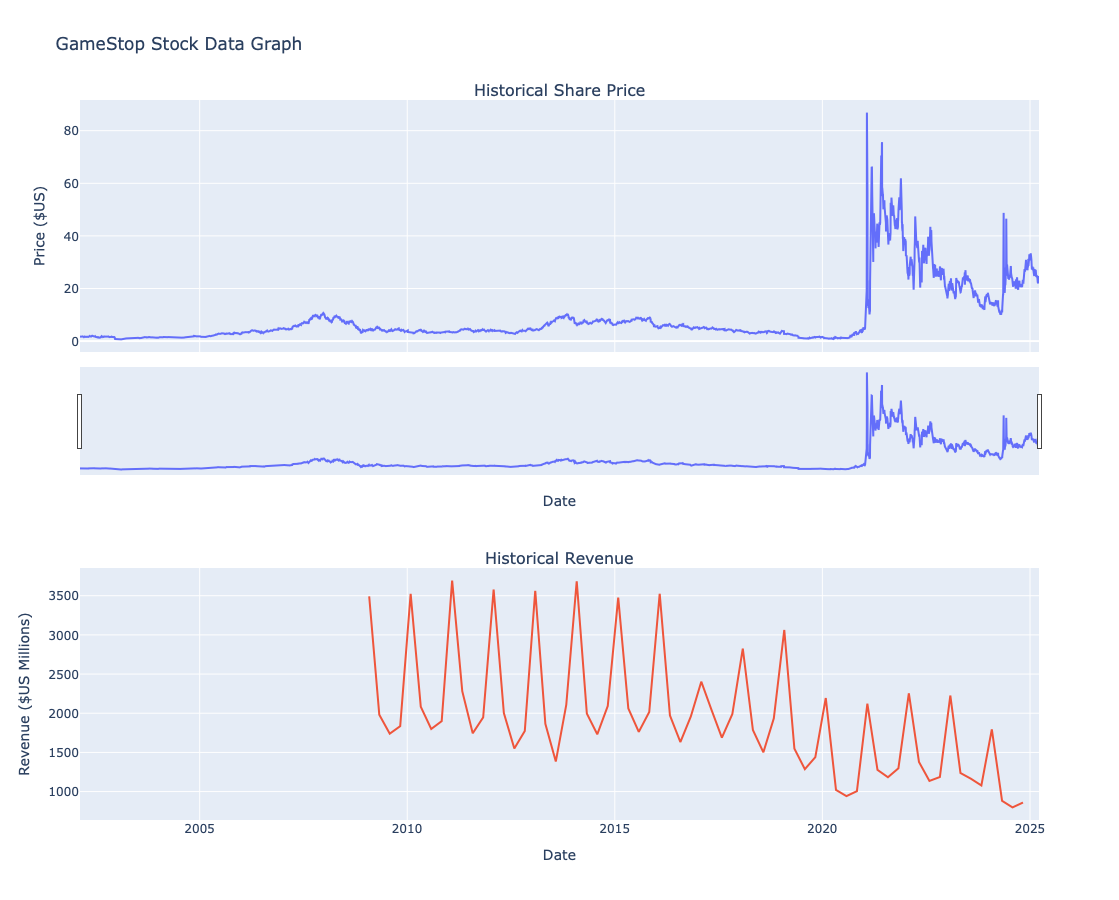

In [136]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')

# Author

## Bernardo Andre Díaz Z.